In [1]:
import pandas as pd
from tqdm import tqdm
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from countries import countries
pd.options.display.float_format="{:,.0f}".format
print("libraries imported")

libraries imported


Import libraries to access functions 

In [2]:
country = pd.DataFrame(countries)

Create a data frame using Pandas with the argument, countries

In [3]:
country

,timezones,code,continent,name,capital
0,[Europe/Andorra],AD,Europe,Andorra,Andorra la Vella
1,[Asia/Kabul],AF,Asia,Afghanistan,Kabul
2,[America/Antigua],AG,North America,Antigua and Barbuda,St. John's
3,[Europe/Tirane],AL,Europe,Albania,Tirana
4,[Asia/Yerevan],AM,Asia,Armenia,Yerevan
...,...,...,...,...,...
188,[Asia/Colombo],LK,Asia,Sri Lanka,Sri Jayewardenepura Kotte
189,[Africa/Mbabane],SZ,Africa,Swaziland,Mbabane
190,[Europe/Zurich],CH,Europe,Switzerland,Bern
191,[Asia/Dubai],AE,Asia,United Arab Emirates,Abu Dhabi


Calling the built-in dataframe, country. Displays data for timezones, code, continent, name, and capital. Displaying this dataframe to merge and join with the Aviation file for a more detailed analysis. 

In [4]:
aviation_data = pd.read_csv("aviation.csv")

Reading the CSV file, using pandas

In [5]:
pd_merged = pd.merge(country, aviation_data, how = "left", left_on="name", right_on="Country Name")
pd_merged.head()

,timezones,code,continent,name,capital,Country Name,Country Code,1970,1971,1972,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,[Europe/Andorra],AD,Europe,Andorra,Andorra la Vella,Andorra,AND,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[Asia/Kabul],AF,Asia,Afghanistan,Kabul,Afghanistan,AFG,"84,700","97,400","104,900",...,"2,279,341","1,737,962","2,044,188","2,209,428","1,929,907","1,917,924","1,647,425","1,125,367","1,066,747",NaN
2,[America/Antigua],AG,North America,Antigua and Barbuda,St. John's,Antigua and Barbuda,ATG,NaN,NaN,NaN,...,"1,424,420","1,310,276","1,218,000","1,216,152","1,039,810","1,042,929","590,517","580,174","526,334",NaN
3,[Europe/Tirane],AL,Europe,Albania,Tirana,Albania,ALB,NaN,NaN,NaN,...,"829,779","814,340","865,848","151,632",NaN,"26,634","204,090","303,137","307,741",NaN
4,[Asia/Yerevan],AM,Asia,Armenia,Yerevan,Armenia,ARM,NaN,NaN,NaN,...,"392,312","364,733","45,000",0,NaN,NaN,NaN,"53,259","193,668",NaN


Combining two data from two dataframes, based on the matching column name "country". Multiple rows have NaN values, that are handled later in the analysis. 

In [6]:
# Basic summary statistics
country.describe()


,timezones,code,continent,name,capital
count,193,193,193,193,193
unique,192,192,6,193,193
top,[America/Guatemala],GT,Africa,Andorra,Andorra la Vella
freq,2,2,53,1,1


Using the built in function: "describe" to Analyze all numerical columns in the column country

In [7]:
data_summary_statistics = aviation_data.describe(include='all', percentiles=[])


print('Data summary statistics:')
display(data_summary_statistics)


Data summary statistics:


,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,266,266,147,149,147,151,165,170,174,174,...,207,207,206,206,202,203,202,205,202,0
unique,266,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,"12,653,981","13,358,367","12,439,600","15,903,824","17,416,127","17,579,774","18,844,529","20,505,777",...,"109,799,457","115,254,762","122,732,252","130,491,855","143,812,868","153,525,762","166,484,211","176,510,447","185,924,266",NaN
std,NaN,NaN,"49,575,081","52,687,376","50,667,060","62,805,508","62,806,518","62,654,566","67,239,475","72,921,355",...,"331,192,657","344,527,205","364,043,503","385,664,555","418,440,773","446,530,913","481,316,833","511,540,993","535,127,860",NaN
min,NaN,NaN,"10,400","8,500","9,000","9,500",0,0,0,0,...,0,0,0,0,"3,036",899,316,316,316,NaN
50%,NaN,NaN,"657,600","714,800","785,600","819,000","1,116,900","1,026,850","1,055,400","1,123,300",...,"3,795,755","4,430,383","4,717,098","4,692,321","4,996,681","5,284,585","5,591,210","6,442,442","6,489,805",NaN
max,NaN,NaN,"310,441,392","331,604,904","327,004,108","401,571,800","421,145,200","432,276,500","471,773,396","513,269,292",...,"2,786,953,830","2,894,054,972","3,048,275,073","3,227,291,386","3,466,478,485","3,705,101,897","3,973,790,463","4,242,447,521","4,396,665,797",NaN


Generated a detailed summary statistics table for all columns in the aviation dataframe. Displayes tge frequency, mean, std, min, max. This provides a quick overview od the dataset. 

In [8]:
pd_merged.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,101,103,103,105,109,113,116,115,116,117,...,136,136,135,136,132,133,132,133,133,0
mean,"2,985,240","3,127,797","3,450,926","3,712,736","3,745,279","3,693,488","3,921,958","4,294,611","4,776,143","5,336,937",...,"16,111,995","16,747,076","17,570,361","18,317,518","20,102,943","21,063,455","22,395,941","23,580,449","24,208,975",NaN
std,"16,369,500","17,270,108","18,982,225","19,939,320","20,109,286","19,513,938","20,953,617","22,697,541","25,684,635","29,340,885",...,"65,523,221","66,341,460","67,441,957","69,202,170","73,653,226","76,042,993","78,988,846","82,587,674","85,354,311",NaN
min,"10,400","8,500","9,000","9,500",0,0,0,0,0,0,...,0,0,0,0,"6,011",899,316,316,316,NaN
25%,"120,200","130,550","132,550","140,000","127,500","122,400","120,050","133,100","132,225","145,000",...,"410,357","535,076","511,588","463,949","497,166","467,713","566,356","516,034","526,334",NaN
50%,"295,600","331,100","375,100","375,700","388,300","387,600","416,250","440,000","428,850","546,100",...,"1,618,679","1,595,196","1,716,702","1,848,580","2,012,705","2,019,816","2,443,181","2,545,105","2,583,595",NaN
75%,"1,335,900","1,243,650","1,411,050","1,697,500","1,606,700","1,681,300","1,748,350","1,918,250","2,066,175","2,345,800",...,"8,595,535","8,932,874","9,994,371","11,032,653","12,321,673","13,105,120","13,720,847","13,364,839","14,610,547",NaN
max,"163,448,992","174,143,104","191,325,408","202,309,200","207,612,400","204,900,400","223,017,296","240,144,992","273,025,504","313,624,000",...,"730,796,000","736,699,000","743,171,000","762,710,000","798,222,000","824,039,000","849,403,000","889,024,000","926,737,000",NaN


In [41]:
# # Load the aviation.csv file to work with the aviation data
# import pandas as pd
# from tqdm.auto import tqdm

# tqdm.pandas()
# aviation_data = pd.read_csv('aviation.csv')

# # Display the head of the aviation_data DataFrame to confirm it's loaded correctly
# print(aviation_data.head())

# # Display the info of the aviation_data DataFrame to understand its structure
# print(aviation_data.info())

                  Country Name Country Code      1970      1971      1972  \
0                        Aruba          ABW       NaN       NaN       NaN   
1  Africa Eastern and Southern          AFE 3,418,300 3,775,300 4,074,500   
2                  Afghanistan          AFG    84,700    97,400   104,900   
3   Africa Western and Central          AFW 1,167,000 1,238,100 1,285,700   
4                       Angola          AGO       NaN       NaN       NaN   

       1973      1974      1975      1976      1977  ...       2011  \
0       NaN       NaN       NaN       NaN       NaN  ...        NaN   
1 4,808,000 5,126,100 5,333,100 6,040,400 5,798,900  ... 33,507,824   
2    96,600    96,100    99,000   101,700   111,200  ...  2,279,341   
3 1,453,300 1,685,700 1,987,500 2,540,000 2,962,100  ...  9,140,452   
4       NaN       NaN       NaN   155,400   282,700  ...    987,798   

        2012       2013       2014       2015       2016       2017  \
0        NaN        NaN        NaN     

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 1970 to 2020
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   United States  50 non-null     float64
dtypes: float64(1)
memory usage: 816.0+ bytes


None

,United States
1970,"163,448,992"
1971,"174,143,104"
1972,"191,325,408"
1973,"202,309,200"
1974,"207,612,400"


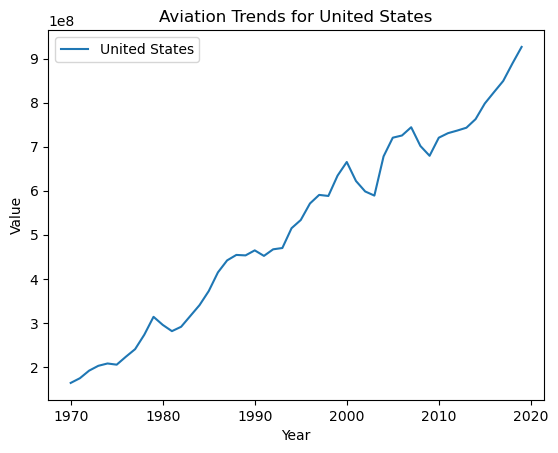

In [11]:
# Specify the country name
country_name = 'United States'

# Filter the DataFrame for the specified country
selected_country = aviation_data[aviation_data['Country Name'] == country_name]

# Drop the 'Country Name' and 'Country Code' columns and transpose for plotting
data_to_plot = selected_country.drop(['Country Name', 'Country Code'], axis=1).T

# Ensure the column names are correct
data_to_plot.columns = [country_name]

# Display the info and head of the data to plot
display(data_to_plot.info())
display(data_to_plot.head())

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plotting aviation trends for the specified country
# Ensure that data_to_plot contains numeric data
data_to_plot.plot(title=f'Aviation Trends for {country_name}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend([country_name])  # Add legend with the country name
plt.show()

Created a plot via Matplotlib to show aviation trends for the united states over time. The plot displays the aviation trends for the United States over the years. The x-axis represents the years, and the y-axis represents the value. 

In [12]:
pd_merged[pd_merged["continent"]=="North America"]

,timezones,code,continent,name,capital,Country Name,Country Code,1970,1971,1972,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,[America/Antigua],AG,North America,Antigua and Barbuda,St. John's,Antigua and Barbuda,ATG,NaN,NaN,NaN,...,"1,424,420","1,310,276","1,218,000","1,216,152","1,039,810","1,042,929","590,517","580,174","526,334",NaN
10,[America/Barbados],BB,North America,Barbados,Bridgetown,Barbados,BRB,NaN,"11,500","19,700",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,[America/Nassau],BS,North America,Bahamas,Nassau,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,[America/Belize],BZ,North America,Belize,Belmopan,Belize,BLZ,NaN,NaN,NaN,...,"179,471","448,016","513,176","877,765","935,604","990,499","1,285,642","1,297,533","1,278,188",NaN
26,"[America/St_Johns, America/Halifax, America/Gl...",CA,North America,Canada,Ottawa,Canada,CAN,"10,180,300","10,247,300","11,628,500",...,"66,078,012","70,467,401","71,526,726","75,528,607","80,228,302","85,406,425","91,404,001","91,504,000","93,352,000",NaN
34,[America/Costa_Rica],CR,North America,Costa Rica,San JosÃ©,Costa Rica,CRI,"255,900","280,400","307,300",...,"1,829,515","1,770,111","1,498,996","1,427,414","1,525,922","1,572,605","1,822,880","1,950,049","2,033,146",NaN
35,[America/Havana],CU,North America,Cuba,Havana,Cuba,CUB,"873,500","979,200","988,300",...,"1,478,596","1,313,503","1,395,072","1,135,200","1,294,458","1,333,078","942,785","563,540","457,713",NaN
42,[America/Dominica],DM,North America,Dominica,Roseau,Dominica,DMA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,[America/Santo_Domingo],DO,North America,Dominican Republic,Santo Domingo,Dominican Republic,DOM,"128,800","182,700","191,500",...,"28,232","28,442","20,004","16,128","14,463","11,903",NaN,NaN,"227,504",NaN
58,[America/Guatemala],GT,North America,Guatemala,Guatemala City,Guatemala,GTM,"112,500","101,100","98,000",...,"326,146","288,014","78,264","69,768","93,129","111,830","155,524","145,795","107,350",NaN


Displays the segmented rows from the merged dataframe, specifically looking at the North America continent. 

In [13]:
pd_merged.groupby("continent").describe()

1970                                                      \
              count       mean        std       min       25%       50%   
continent                                                                 
Africa           30    180,117    276,783    23,000    52,450   118,450   
Asia             23  1,377,874  3,330,912    40,500   200,550   548,600   
Europe           22  2,960,927  3,776,850   127,800   609,550 1,390,800   
North America    14 12,818,935 43,437,611    10,400   131,150   287,150   
Oceania           2  4,590,350  3,858,470 1,862,000 3,226,175 4,590,350   
South America    10  1,062,840  1,296,606    17,800   225,475   405,000   

                                     1971             ...       2019  \
                    75%         max count       mean  ...        75%   
continent                                             ...              
Africa          184,100   1,519,000    31    200,742  ...  1,685,542   
Asia            931,050  16,315,100    23  1,471,370  ... 42,125,619   
Europe        3,185,550  15,568,800    22  3,225,005  ... 20,945,509   
North America   745,400 163,448,992    15 12,716,107  ... 12,497,758   
Oceania       5,954,525   7,318,700     2  4,625,200  ...  1,947,349   
South America 1,892,675   3,339,800    10  1,115,650  ... 20,763,664   

                           2020                               
                      max count mean std min 25% 50% 75% max  
continent                                                     
Africa         25,650,178     0  NaN NaN NaN NaN NaN NaN NaN  
Asia          167,499,116     0  NaN NaN NaN NaN NaN NaN NaN  
Europe        142,392,528     0  NaN NaN NaN NaN NaN NaN NaN  
North America 926,737,000     0  NaN NaN NaN NaN NaN NaN NaN  
Oceania        76,850,597     0  NaN NaN NaN NaN NaN NaN NaN  
South America 102,917,546     0  NaN NaN NaN NaN NaN NaN NaN  

[6 rows x 408 columns]

In [14]:
country_counts = pd_merged['Country Name'].value_counts()
display(country_counts.head())

Andorra     1
Poland      1
Palau       1
Paraguay    1
Qatar       1
Name: Country Name, dtype: int64

To better understand data distribution,the frequency is printed for each country to help understand the distribution of data accross different countries. Specifically looking for imbalances that can impact the results. 

In [50]:
year_columns = [str(year) for year in range(1970, 2021)]
yearly_totals = pd_merged[year_columns].sum()
display(yearly_totals)

1970     301,509,192
1971     322,163,104
1972     355,445,408
1973     389,837,300
1974     408,235,400
1975     417,364,200
1976     454,947,096
1977     493,880,292
1978     554,032,604
1979     624,421,600
1980     617,626,588
1981     614,318,700
1982     626,170,508
1983     655,586,796
1984     700,154,788
1985     747,944,304
1986     801,180,096
1987     857,075,504
1988     896,291,712
1989     924,489,900
1990     959,995,316
1991     936,089,304
1992   1,002,142,692
1993   1,018,025,216
1994   1,105,492,504
1995   1,158,274,240
1996   1,238,885,104
1997   1,291,904,592
1998   1,308,972,280
1999   1,389,980,500
2000   1,486,555,765
2001   1,442,353,796
2002   1,402,812,949
2003   1,427,661,211
2004   1,601,815,323
2005   1,652,942,494
2006   1,718,720,407
2007   1,806,950,959
2008   1,783,247,071
2009   1,785,836,702
2010   2,079,823,244
2011   2,191,231,331
2012   2,277,602,395
2013   2,371,998,762
2014   2,491,182,417
2015   2,653,588,456
2016   2,801,439,471
2017   2,956,

The total number of incidents for each year from 1970 to 2020 in the aviation_data DataFrame has been calculated and displayed. The data shows that the number of incidents has generally increased over the years.

In [24]:
transposed_data.index
transposed_data.values
transposed_data

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Country Code,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1970,NaN,"3,418,300","84,700","1,167,000",NaN,NaN,NaN,"4,209,300",NaN,"2,332,000",...,NaN,"1,525,600",NaN,"310,441,392",NaN,NaN,"25,900","1,519,000","187,800","267,400"
1971,NaN,"3,775,300","97,400","1,238,100",NaN,NaN,NaN,"4,737,000",NaN,"2,218,600",...,NaN,"1,051,300",NaN,"331,604,904",NaN,NaN,"54,500","1,659,500","214,200","291,300"
1972,NaN,"4,074,500","104,900","1,285,700",NaN,NaN,NaN,"5,625,600",NaN,"2,358,500",...,NaN,"854,400",NaN,NaN,NaN,NaN,"57,000","1,868,100","230,100","315,000"
1973,NaN,"4,808,000","96,600","1,453,300",NaN,NaN,NaN,"6,569,400",NaN,"2,312,700",...,NaN,"664,700",NaN,"401,571,800",NaN,NaN,"61,500","2,313,800","230,600","340,000"
1974,NaN,"5,126,100","96,100","1,685,700",NaN,NaN,NaN,"8,227,100","127,500","2,943,500",...,NaN,"552,600",NaN,"421,145,200",NaN,NaN,"66,500","2,763,600","240,600",NaN
1975,NaN,"5,333,100","99,000","1,987,500",NaN,NaN,NaN,"10,178,000","173,000","3,299,200",...,NaN,"165,000",NaN,"432,276,500",NaN,NaN,"70,000","2,936,400","232,600",NaN
1976,NaN,"6,040,400","101,700","2,540,000","155,400",NaN,NaN,"13,313,000","240,100","3,293,600",...,NaN,NaN,NaN,"471,773,396",NaN,NaN,"262,800","2,998,800","256,800",NaN
1977,NaN,"5,798,900","111,200","2,962,100","282,700",NaN,NaN,"16,062,400","299,800","3,884,100",...,NaN,NaN,NaN,"513,269,292",NaN,NaN,"275,000","3,076,800","299,400",NaN
1978,NaN,"6,195,600","100,400","3,543,900","308,000",NaN,NaN,"18,669,700","374,500","3,946,700",...,NaN,NaN,NaN,"576,090,004",NaN,NaN,"295,000","3,211,200","317,100",NaN


In [35]:
transposed_data1 = transposed_data.iloc[1:, :]
type(transposed_data1.iloc[ 0, 2])
transposed_data1.isna().sum()

transposed_data1 = transposed_data1.fillna(transposed_data1.mean())
transposed_data1.isna().sum()


Country Name
Aruba                           0
Africa Eastern and Southern     0
Afghanistan                     0
Africa Western and Central      0
Angola                          0
                               ..
Kosovo                         51
Yemen, Rep.                     0
South Africa                    0
Zambia                          0
Zimbabwe                        0
Length: 266, dtype: int64

In [38]:
transposed_data1 = transposed_data1.dropna(axis=1)

drop columns with all NA

In [40]:
transposed_data1.head(1)

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,...,Uzbekistan,"Venezuela, RB",Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1970,"248,891","3,418,300","84,700","1,167,000","657,339","254,909","4,209,300","21,120,127","2,332,000","387,568",...,"2,178,808","1,253,300","1,525,600","133,704","310,441,392","177,566","25,900","1,519,000","187,800","267,400"


In [45]:
transposed_data1.values.shape
transposed_data1["Aruba"].shape

(51,)

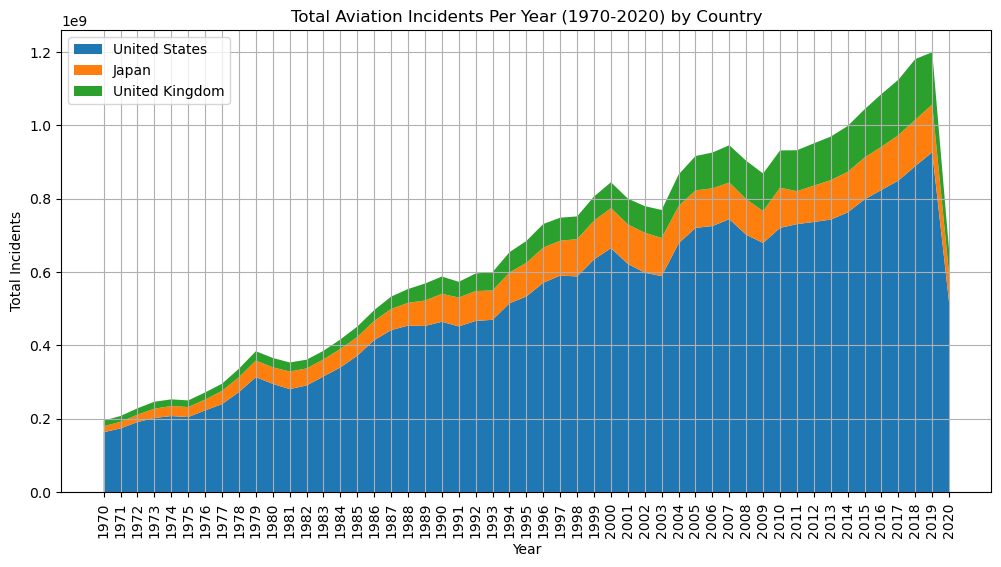

In [59]:

# stacked area chart
plt.figure(figsize=(12, 6))
plt.xticks(rotation= 90)
#plt.stackplot(transposed_data1.index, transposed_data1.values, labels=transposed_data1.columns)
plt.stackplot(transposed_data1.index, transposed_data1["United States"], transposed_data1["Japan"],
              transposed_data1["United Kingdom"], labels= ["United States", "Japan", "United Kingdom"])
plt.title('Total Aviation Incidents Per Year (1970-2020) by Country')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [60]:
# # inspecting the transposed_data to understand the issue with the index
# code_to_inspect_transposed_data = 'print(transposed_data.index)'

# # Execute the code to print out the index of the transposed_data DataFrame
# code_to_inspect_transposed_data

In [61]:
pd_merged[["name", "Total Incidents"]].sort_values("Total Incidents", ascending= False)

,name,Total Incidents
153,United States,"25,844,573,061"
74,Japan,"3,855,840,520"
192,United Kingdom,"3,229,279,690"
39,Germany,"2,541,682,597"
51,France,"1,972,314,854"
...,...,...
91,Macedonia,0
21,Bahamas,0
156,Vatican City,0
160,Yemen,0


In [51]:
total_incidents_per_country = pd_merged[year_columns].sum(axis=1)
pd_merged['Total Incidents'] = total_incidents_per_country
top_countries = pd_merged.nlargest(5, 'Total Incidents')['Country Name']
display(top_countries)

153     United States
74              Japan
192    United Kingdom
39            Germany
51             France
Name: Country Name, dtype: object

In [16]:
# # Removing 'Country Code' from the index and converting the rest to integers
# transposed_data = transposed_data.drop('Country Code')
# transposed_data.index = transposed_data.index.map(int)

# # Now we can attempt to plot the stacked area chart again
# plt.figure(figsize=(12, 6))
# plt.stackplot(transposed_data.index, transposed_data.values, labels=transposed_data.columns)
# plt.title('Total Aviation Incidents Per Year (1970-2020) by Country')
# plt.xlabel('Year')
# plt.ylabel('Total Incidents')
# plt.legend(loc='upper left')
# plt.grid(True)
# plt.show()

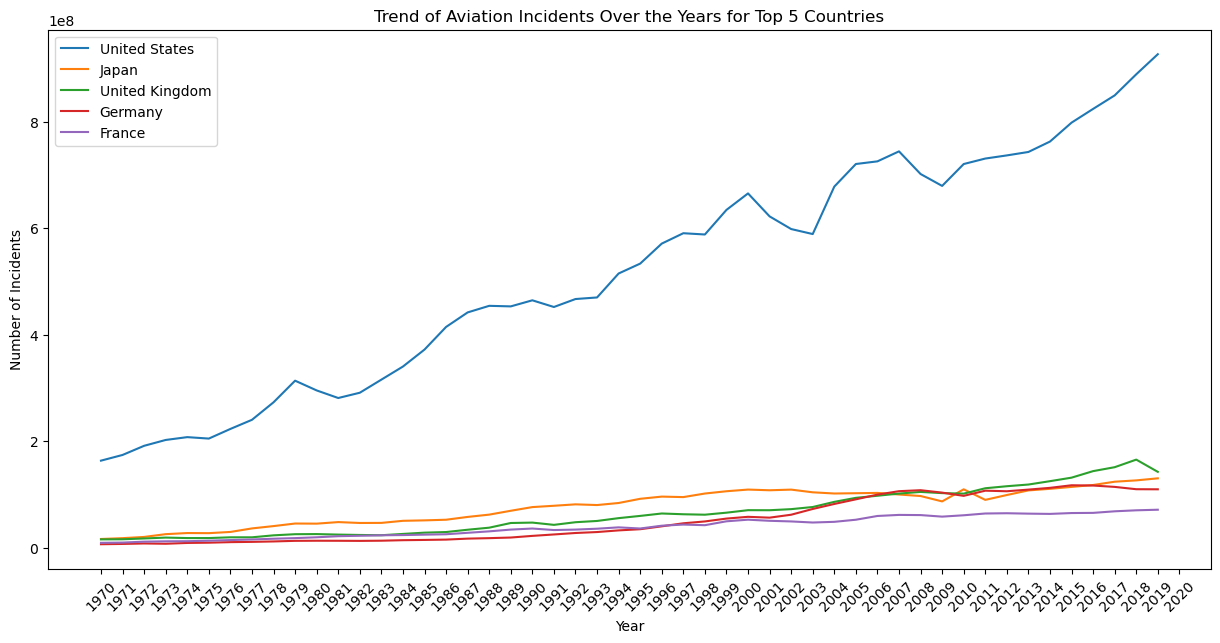

In [62]:
fig, ax = plt.subplots(figsize=(15, 7))

for country in top_countries:
    country_data = pd_merged[pd_merged['Country Name'] == country]
    ax.plot(year_columns, country_data[year_columns].values[0], label=country)

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Number of Incidents')
ax.set_title('Trend of Aviation Incidents Over the Years for Top 5 Countries')

plt.xticks(rotation=45)
plt.show()

In [16]:
yearly_change = pd_merged[year_columns].diff(axis=1)
pd_merged[year_columns] = yearly_change
display(pd_merged.head())

,timezones,code,continent,name,capital,Country Name,Country Code,1970,1971,1972,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Incidents
0,[Europe/Andorra],AD,Europe,Andorra,Andorra la Vella,Andorra,AND,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,[Asia/Kabul],AF,Asia,Afghanistan,Kabul,Afghanistan,AFG,NaN,"12,700","7,500",...,"-541,379","306,226","165,240","-279,521","-11,983","-270,499","-522,058","-58,620",NaN,"22,837,722"
2,[America/Antigua],AG,North America,Antigua and Barbuda,St. John's,Antigua and Barbuda,ATG,NaN,NaN,NaN,...,"-114,144","-92,276","-1,848","-176,342","3,119","-452,412","-10,343","-53,840",NaN,"35,822,675"
3,[Europe/Tirane],AL,Europe,Albania,Tirana,Albania,ALB,NaN,NaN,NaN,...,"-15,439","51,508","-714,216",NaN,NaN,"177,456","99,047","4,604",NaN,"6,372,713"
4,[Asia/Yerevan],AM,Asia,Armenia,Yerevan,Armenia,ARM,NaN,NaN,NaN,...,"-27,579","-319,733","-45,000",NaN,NaN,NaN,NaN,"140,409",NaN,"8,138,929"


In [63]:
for country in top_countries:
    country_data = pd_merged[pd_merged['Country Name'] == country]
    max_increase_year = country_data[year_columns].idxmax(axis=1).values[0]
    max_decrease_year = country_data[year_columns].idxmin(axis=1).values[0]
    print(f'For {country}, the year with the highest increase in incidents is {max_increase_year} and the year with the highest decrease in incidents is {max_decrease_year}.')

For United States, the year with the highest increase in incidents is 2019 and the year with the highest decrease in incidents is 1970.
For Japan, the year with the highest increase in incidents is 2019 and the year with the highest decrease in incidents is 1970.
For United Kingdom, the year with the highest increase in incidents is 2018 and the year with the highest decrease in incidents is 1970.
For Germany, the year with the highest increase in incidents is 2015 and the year with the highest decrease in incidents is 1970.
For France, the year with the highest increase in incidents is 2019 and the year with the highest decrease in incidents is 1970.


In [64]:
total_incidents_per_country = pd_merged[year_columns].sum(axis=1)
pd_merged['Total Incidents'] = total_incidents_per_country
top_countries = pd_merged.nlargest(5, 'Total Incidents')['Country Name']
display(top_countries)

153     United States
74              Japan
192    United Kingdom
39            Germany
51             France
Name: Country Name, dtype: object

In [66]:
yearly_change = pd_merged[year_columns].diff(axis=1)
pd_merged[year_columns] = yearly_change
display(pd_merged.head())

,timezones,code,continent,name,capital,Country Name,Country Code,1970,1971,1972,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Incidents
0,[Europe/Andorra],AD,Europe,Andorra,Andorra la Vella,Andorra,AND,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,[Asia/Kabul],AF,Asia,Afghanistan,Kabul,Afghanistan,AFG,NaN,"12,700","7,500",...,"-541,379","306,226","165,240","-279,521","-11,983","-270,499","-522,058","-58,620",NaN,"22,837,722"
2,[America/Antigua],AG,North America,Antigua and Barbuda,St. John's,Antigua and Barbuda,ATG,NaN,NaN,NaN,...,"-114,144","-92,276","-1,848","-176,342","3,119","-452,412","-10,343","-53,840",NaN,"35,822,675"
3,[Europe/Tirane],AL,Europe,Albania,Tirana,Albania,ALB,NaN,NaN,NaN,...,"-15,439","51,508","-714,216",NaN,NaN,"177,456","99,047","4,604",NaN,"6,372,713"
4,[Asia/Yerevan],AM,Asia,Armenia,Yerevan,Armenia,ARM,NaN,NaN,NaN,...,"-27,579","-319,733","-45,000",NaN,NaN,NaN,NaN,"140,409",NaN,"8,138,929"


In [67]:
for country in top_countries:
    country_data = pd_merged[pd_merged['Country Name'] == country]
    max_increase_year = country_data[year_columns].idxmax(axis=1).values[0]
    max_decrease_year = country_data[year_columns].idxmin(axis=1).values[0]
    print(f'For {country}, the year with the highest increase in incidents is {max_increase_year} and the year with the highest decrease in incidents is {max_decrease_year}.')

For United States, the year with the highest increase in incidents is 2004 and the year with the highest decrease in incidents is 2001.
For Japan, the year with the highest increase in incidents is 2010 and the year with the highest decrease in incidents is 2011.
For United Kingdom, the year with the highest increase in incidents is 2018 and the year with the highest decrease in incidents is 2019.
For Germany, the year with the highest increase in incidents is 2003 and the year with the highest decrease in incidents is 2010.
For France, the year with the highest increase in incidents is 1999 and the year with the highest decrease in incidents is 2009.


In [78]:
total_incidents = pd_merged.select_dtypes(include=[int, float]).sum(axis=1).to_frame()
total_incidents.rename(columns= {0: "Total"}, inplace= True)

total_incidents

,Total
0,0
1,"21,970,347"
2,"35,960,009"
3,"6,796,352"
4,"7,921,238"
...,...
188,"95,575,513"
189,0
190,"644,075,875"
191,"962,269,238"


In [79]:
sum_df = pd.concat([pd_merged.iloc[:,0:7], total_incidents],axis=1)
top_ten = sum_df.sort_values("Total", ascending= False).head(10)
top_ten


,timezones,code,continent,name,capital,Country Name,Country Code,Total
153,"[America/New_York, America/Detroit, America/Ke...",US,North America,United States,"Washington, D.C.",United States,USA,"26,607,861,069"
74,[Asia/Tokyo],JP,Asia,Japan,Tokyo,Japan,JPN,"3,969,758,772"
192,[Europe/London],GB,Europe,United Kingdom,London,United Kingdom,GBR,"3,356,103,418"
39,[Europe/Berlin],DE,Europe,Germany,Berlin,Germany,DEU,"2,644,818,347"
51,[Europe/Paris],FR,Europe,France,Paris,France,FRA,"2,034,496,131"
20,"[America/Noronha, America/Belem, America/Forta...",BR,South America,Brazil,BrasÃ­lia,Brazil,BRA,"1,903,653,473"
26,"[America/St_Johns, America/Halifax, America/Gl...",CA,North America,Canada,Ottawa,Canada,CAN,"1,869,189,482"
67,[Asia/Calcutta],IN,Asia,India,New Delhi,India,IND,"1,816,932,548"
8,"[Australia/Lord_Howe, Australia/Hobart, Austra...",AU,Oceania,Australia,Canberra,Australia,AUS,"1,711,342,683"
187,"[Europe/Madrid, Africa/Ceuta, Atlantic/Canary]",ES,Europe,Spain,Madrid,Spain,ESP,"1,710,863,040"


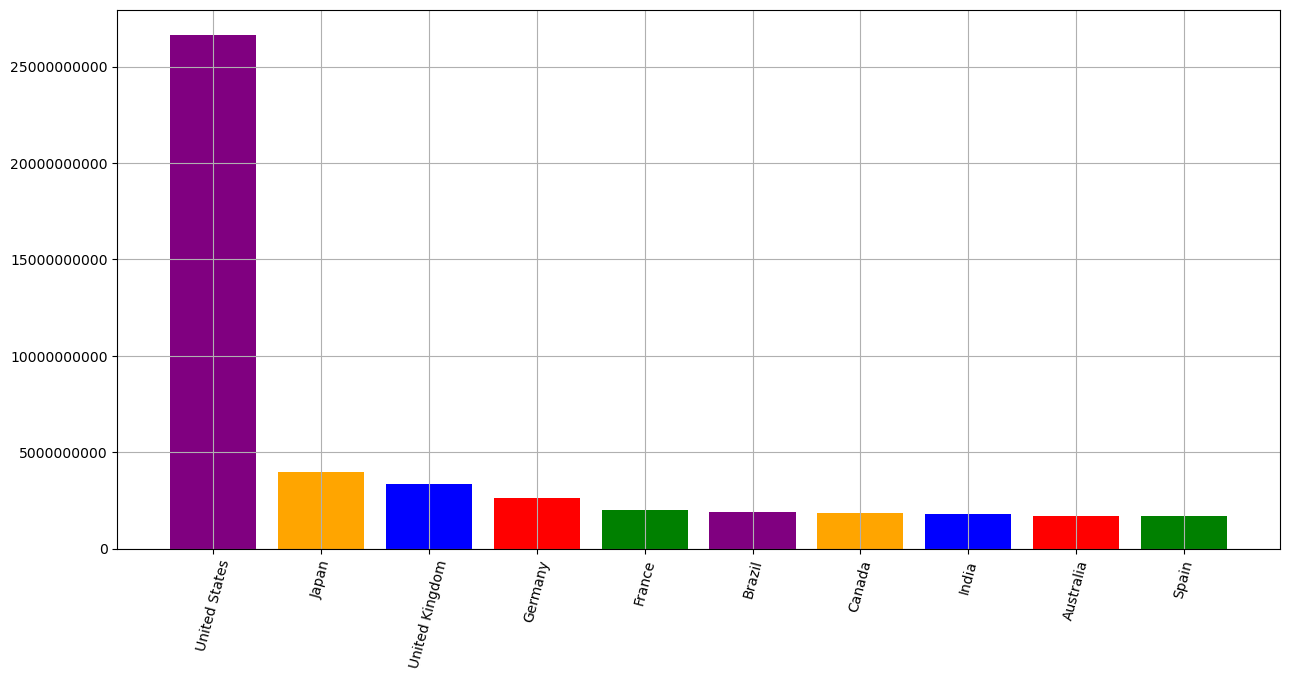

In [80]:
#top_ten.plot(y="Total", kind="bar", x = "name")
plt.figure(figsize=(15,7))
plt.bar(x=top_ten["name"], height= top_ten["Total"], color=["purple", "orange", "blue", "red", "green", "purple", "orange", "blue", "red", "green" ])
plt.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=75)
plt.grid()
plt.show()

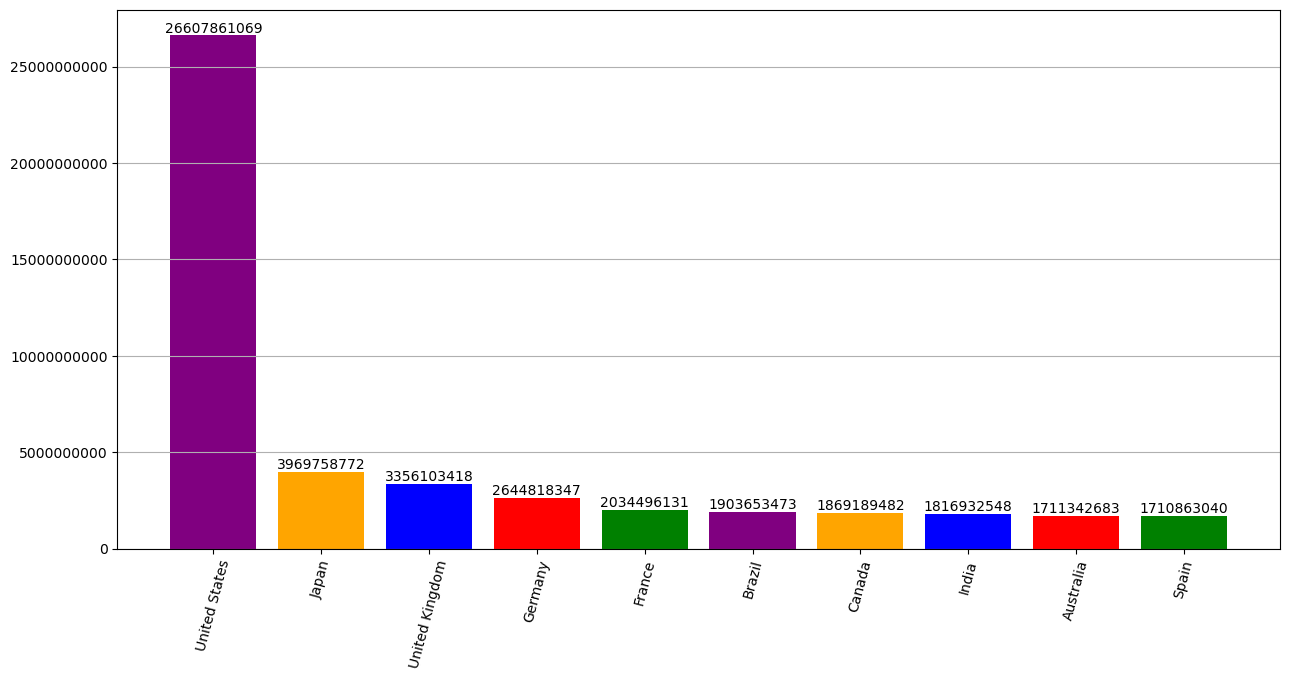

In [81]:
plt.figure(figsize=(15, 7))

# Bar plot
plt.bar(x=top_ten["name"], height=top_ten["Total"], color=["purple", "orange", "blue", "red", "green", "purple", "orange", "blue", "red", "green"])

# Adding data labels with rounded values
for index, value in enumerate(top_ten["Total"]):
    rounded_value = round(value)  # Round the value
    plt.text(index, value, f'{rounded_value}', ha='center', va='bottom')

plt.xticks(rotation=75)
plt.ticklabel_format(style="plain", axis="y")
plt.grid(axis='y')

plt.show()


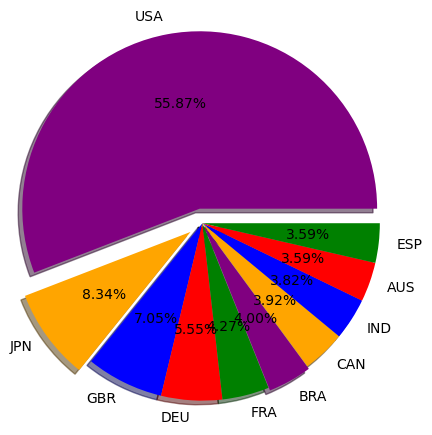

In [82]:
#plt.figure(figsize=(15,7))
plt.pie(x=top_ten["Total"], colors=["purple", "orange", "blue", "red", "green", "purple", "orange", "blue", "red", "green" ],
       labels=top_ten["Country Code"], counterclock=True, autopct="%.2f%%", explode=[0.1, 0.10,0,0,0,0.02,0,0,0.0,0], shadow= True,
       radius=1.2)
#plt.ticklabel_format(style="plain", axis="y")
#plt.xticks(rotation=75)
#plt.grid()
plt.show()

In [83]:
continents_merged = pd_merged.groupby("continent",group_keys=True).apply(lambda x:x)
continents_merged

timezones code      continent          name  \
continent                                                                   
Africa        5         [Africa/Luanda]   AO         Africa        Angola   
              13   [Africa/Ouagadougou]   BF         Africa  Burkina Faso   
              16     [Africa/Bujumbura]   BI         Africa       Burundi   
              17    [Africa/Porto-Novo]   BJ         Africa         Benin   
              23      [Africa/Gaborone]   BW         Africa      Botswana   
...                                 ...  ...            ...           ...   
South America 114        [America/Lima]   PE  South America          Peru   
              121    [America/Asuncion]   PY  South America      Paraguay   
              138  [America/Paramaribo]   SR  South America      Suriname   
              154  [America/Montevideo]   UY  South America       Uruguay   
              157     [America/Caracas]   VE  South America     Venezuela   

                       capital  Country Name Country Code  1970     1971  \
continent                                                                  
Africa        5         Luanda        Angola          AGO   NaN      NaN   
              13   Ouagadougou  Burkina Faso          BFA   NaN    1,500   
              16     Bujumbura       Burundi          BDI   NaN      NaN   
              17    Porto-Novo         Benin          BEN   NaN    1,500   
              23      Gaborone      Botswana          BWA   NaN      NaN   
...                        ...           ...          ...   ...      ...   
South America 114         Lima          Peru          PER   NaN -126,800   
              121    AsunciÃ³n      Paraguay          PRY   NaN    3,700   
              138   Paramaribo      Suriname          SUR   NaN      NaN   
              154   Montevideo       Uruguay          URY   NaN    2,000   
              157      Caracas           NaN          NaN   NaN      NaN   

                     1972  ...      2012      2013     2014      2015  \
continent                  ...                                          
Africa        5       NaN  ...   144,626   189,448   88,080  -165,461   
              13   -5,100  ...    -8,016    13,302  -21,576     5,170   
              16      NaN  ...       NaN       NaN      NaN       NaN   
              17   -5,100  ...         0    79,326  -77,376    52,128   
              23      NaN  ...      -734  -144,134  -65,004    20,557   
...                   ...  ...       ...       ...      ...       ...   
South America 114 261,600  ... 1,465,235 2,181,082   28,739 1,592,985   
              121 -30,600  ...   -51,220   -82,628 -102,704  -156,840   
              138     NaN  ...    36,429    14,679   13,944    -9,466   
              154 -85,300  ...       NaN       NaN      NaN       NaN   
              157     NaN  ...       NaN       NaN      NaN       NaN   

                       2016      2017      2018      2019  2020  \
continent                                                         
Africa        5     238,055  -107,023   141,105   -79,669   NaN   
              13     22,360        99    44,496    13,751   NaN   
              16        NaN       NaN       NaN       NaN   NaN   
              17   -111,493       NaN       NaN       NaN   NaN   
              23     27,847   -30,723    29,744    45,935   NaN   
...                     ...       ...       ...       ...   ...   
South America 114 1,204,093 1,012,395 1,664,377 1,062,045   NaN   
              121    15,709   -13,437   256,131   -78,018   NaN   
              138    20,408     4,845   -12,588   -35,746   NaN   
              154       NaN       NaN       NaN       NaN   NaN   
              157       NaN       NaN       NaN       NaN   NaN   

                   Total Incidents  
continent                           
Africa        5         28,922,934  
              13         4,985,842  
              16           195,500  
              17         2,586,4

In [84]:
continents_merged.loc["Africa"]

,timezones,code,continent,name,capital,Country Name,Country Code,1970,1971,1972,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Incidents
5,[Africa/Luanda],AO,Africa,Angola,Luanda,Angola,AGO,NaN,NaN,NaN,...,"144,626","189,448","88,080","-165,461","238,055","-107,023","141,105","-79,669",NaN,"28,922,934"
13,[Africa/Ouagadougou],BF,Africa,Burkina Faso,Ouagadougou,Burkina Faso,BFA,NaN,"1,500","-5,100",...,"-8,016","13,302","-21,576","5,170","22,360",99,"44,496","13,751",NaN,"4,985,842"
16,[Africa/Bujumbura],BI,Africa,Burundi,Bujumbura,Burundi,BDI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"195,500"
17,[Africa/Porto-Novo],BJ,Africa,Benin,Porto-Novo,Benin,BEN,NaN,"1,500","-5,100",...,0,"79,326","-77,376","52,128","-111,493",NaN,NaN,NaN,NaN,"2,586,473"
23,[Africa/Gaborone],BW,Africa,Botswana,Gaborone,Botswana,BWA,NaN,NaN,NaN,...,-734,"-144,134","-65,004","20,557","27,847","-30,723","29,744","45,935",NaN,"6,600,428"
27,"[Africa/Kinshasa, Africa/Lubumbashi]",CD,Africa,Democratic Republic of the Congo,Kinshasa,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
28,[Africa/Brazzaville],CG,Africa,Republic of the Congo,Brazzaville,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
29,[Africa/Abidjan],CI,Africa,CÃ´te d'Ivoire,Yamoussoukro,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
31,[Africa/Douala],CM,Africa,Cameroon,YaoundÃ©,Cameroon,CMR,NaN,"42,700","21,500",...,"77,020","39,181","-11,448","-8,552","76,384","-107,592","29,136","-66,255",NaN,"17,261,418"
36,[Atlantic/Cape_Verde],CV,Africa,Cape Verde,Praia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [85]:
continents_merged.loc["South America"]

,timezones,code,continent,name,capital,Country Name,Country Code,1970,1971,1972,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Incidents
6,"[America/Argentina/Buenos_Aires, America/Argen...",AR,South America,Argentina,Buenos Aires,Argentina,ARG,NaN,"-113,400","139,900",...,"784,830","2,575,607","170,636","2,123,270","831,171","1,672,917","1,335,282","1,376,824",NaN,"348,875,091"
19,[America/La_Paz],BO,South America,Bolivia,Sucre,Bolivia,BOL,NaN,"87,100","47,900",...,"80,157","-178,182","1,535,156","552,227","-436,532","374,688","68,686","-55,154",NaN,"82,786,185"
20,"[America/Noronha, America/Belem, America/Forta...",BR,South America,Brazil,BrasÃ­lia,Brazil,BRA,NaN,"571,200","760,400",...,"6,892,205","839,073","4,811,987","1,635,731","-7,896,982","2,253,332","5,714,268","807,569",NaN,"1,804,075,727"
30,"[America/Santiago, Pacific/Easter]",CL,South America,Chile,Santiago,Chile,CHL,NaN,"115,900","39,400",...,"1,942,993","913,427","541,610","658,869","1,355,675","1,302,537","1,852,211","1,680,574",NaN,"258,929,889"
33,[America/Bogota],CO,South America,Colombia,BogotÃ¡,Colombia,COL,NaN,"-50,500","3,900",...,"3,243,924","4,916,779","1,745,921","2,234,564","1,352,935","242,240","1,199,139","3,327,806",NaN,"549,659,648"
44,"[America/Guayaquil, Pacific/Galapagos]",EC,South America,Ecuador,Quito,Ecuador,ECU,NaN,"38,000","-19,700",...,"44,291","399,115","517,567","2,728","-578,090","21,509","244,026","-537,283",NaN,"98,373,376"
61,[America/Guyana],GY,South America,Guyana,Georgetown,Guyana,GUY,NaN,900,300,...,"-92,487","-247,780",0,NaN,NaN,NaN,NaN,"2,628",NaN,"3,466,730"
114,[America/Lima],PE,South America,Peru,Lima,Peru,PER,NaN,"-126,800","261,600",...,"1,465,235","2,181,082","28,739","1,592,985","1,204,093","1,012,395","1,664,377","1,062,045",NaN,"219,562,717"
121,[America/Asuncion],PY,South America,Paraguay,AsunciÃ³n,Paraguay,PRY,NaN,"3,700","-30,600",...,"-51,220","-82,628","-102,704","-156,840","15,709","-13,437","256,131","-78,018",NaN,"15,375,242"
138,[America/Paramaribo],SR,South America,Suriname,Paramaribo,Suriname,SUR,NaN,NaN,NaN,...,"36,429","14,679","13,944","-9,466","20,408","4,845","-12,588","-35,746",NaN,"8,704,598"


In [86]:
continents_merged.loc["Asia"]

,timezones,code,continent,name,capital,Country Name,Country Code,1970,1971,1972,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Incidents
1,[Asia/Kabul],AF,Asia,Afghanistan,Kabul,Afghanistan,AFG,NaN,"12,700","7,500",...,"-541,379","306,226","165,240","-279,521","-11,983","-270,499","-522,058","-58,620",NaN,"22,837,722"
4,[Asia/Yerevan],AM,Asia,Armenia,Yerevan,Armenia,ARM,NaN,NaN,NaN,...,"-27,579","-319,733","-45,000",NaN,NaN,NaN,NaN,"140,409",NaN,"8,138,929"
9,[Asia/Baku],AZ,Asia,Azerbaijan,Baku,Azerbaijan,AZE,NaN,NaN,NaN,...,"211,670","91,626","118,482","32,920","158,527","369,669","-51,762","305,734",NaN,"35,697,935"
11,[Asia/Dhaka],BD,Asia,Bangladesh,Dhaka,Bangladesh,BGD,NaN,NaN,NaN,...,"172,673","586,646","270,207","945,900","-181,946","844,870","1,016,657","281,730",NaN,"73,644,377"
15,[Asia/Bahrain],BH,Asia,Bahrain,Manama,Bahrain,BHR,NaN,"39,000","40,000",...,"270,789","-1,235,139","544,848","142,260","-93,538","-29,734","686,519","563,559",NaN,"88,615,332"
18,[Asia/Brunei],BN,Asia,Brunei Darussalam,Bandar Seri Begawan,Brunei Darussalam,BRN,NaN,NaN,NaN,...,"-268,765","95,614","-78,636","88,855","18,606","3,592","62,254","186,858",NaN,"30,169,734"
22,[Asia/Thimphu],BT,Asia,Bhutan,Thimphu,Bhutan,BTN,NaN,NaN,NaN,...,"-32,748","14,591","94,164","-139,296","61,237","30,542","21,206",243,NaN,"2,978,337"
32,"[Asia/Shanghai, Asia/Harbin, Asia/Chongqing, A...",CN,Asia,People's Republic of China,Beijing,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
37,[Asia/Nicosia],CY,Asia,Cyprus,Nicosia,Cyprus,CYP,NaN,"43,700","50,800",...,"22,859","-74,768","-522,840","-664,963","201,248","486,901","-310,146","-5,972",NaN,"45,407,326"
53,[Asia/Tbilisi],GE,Asia,Georgia,Tbilisi,Georgia,GEO,NaN,NaN,NaN,...,"-44,267","10,953","7,273","35,674","-11,815","121,303","174,283","99,294",NaN,"6,192,005"


In [87]:
continents_merged.index

MultiIndex([(       'Africa',   5),
            (       'Africa',  13),
            (       'Africa',  16),
            (       'Africa',  17),
            (       'Africa',  23),
            (       'Africa',  27),
            (       'Africa',  28),
            (       'Africa',  29),
            (       'Africa',  31),
            (       'Africa',  36),
            ...
            ('South America',  20),
            ('South America',  30),
            ('South America',  33),
            ('South America',  44),
            ('South America',  61),
            ('South America', 114),
            ('South America', 121),
            ('South America', 138),
            ('South America', 154),
            ('South America', 157)],
           names=['continent', None], length=193)

In [88]:
continents_merged.loc["Europe"]

,timezones,code,continent,name,capital,Country Name,Country Code,1970,1971,1972,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Incidents
0,[Europe/Andorra],AD,Europe,Andorra,Andorra la Vella,Andorra,AND,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,[Europe/Tirane],AL,Europe,Albania,Tirana,Albania,ALB,NaN,NaN,NaN,...,"-15,439","51,508","-714,216",NaN,NaN,"177,456","99,047","4,604",NaN,"6,372,713"
7,[Europe/Vienna],AT,Europe,Austria,Vienna,Austria,AUT,NaN,"70,700","124,500",...,"430,589","518,613","173,035","-491,848","6,133","1,446,866","-3,236,135","33,541,097",NaN,"322,759,773"
12,[Europe/Brussels],BE,Europe,Belgium,Brussels,Belgium,BEL,NaN,"35,800","55,700",...,"869,612","13,256","1,013,798","937,836","1,072,267","1,131,522","-37,357","639,700",NaN,"252,519,521"
14,[Europe/Sofia],BG,Europe,Bulgaria,Sofia,Bulgaria,BGR,NaN,"-3,700","39,800",...,"40,194","40,158","46,927","3,351","28,835","40,736","-110,424","-189,817",NaN,"56,360,690"
24,[Europe/Minsk],BY,Europe,Belarus,Minsk,Belarus,BLR,NaN,NaN,NaN,...,"205,482","216,419","158,232","171,303","568,159","435,906","267,068","448,086",NaN,"23,508,171"
38,[Europe/Prague],CZ,Europe,Czech Republic,Prague,Czech Republic,CZE,NaN,"-79,400","271,900",...,"-1,307,934","1,591,794","-176,681","-1,631,967","670,630","1,402,013","3,400,620","-3,405,128",NaN,"128,548,887"
39,[Europe/Berlin],DE,Europe,Germany,Berlin,Germany,DEU,NaN,"531,200","889,900",...,"-1,064,301","3,083,847","3,290,777","4,869,751","-509,263","-2,552,902","-4,364,483","-162,452",NaN,"2,541,682,597"
41,[Europe/Copenhagen],DK,Europe,Denmark,Copenhagen,Denmark,DNK,NaN,"281,500","228,100",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"148,725,685"
45,[Europe/Tallinn],EE,Europe,Estonia,Tallinn,Estonia,EST,NaN,NaN,NaN,...,"299,586","-286,931","-24,708","-90,491","-140,115","-359,171","49,699","-61,945",NaN,"10,555,772"


In [89]:
continents_merged.index.droplevel(level=1).unique()

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object', name='continent')

In [90]:
continents_merged.loc["Asia"]

,timezones,code,continent,name,capital,Country Name,Country Code,1970,1971,1972,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Incidents
1,[Asia/Kabul],AF,Asia,Afghanistan,Kabul,Afghanistan,AFG,NaN,"12,700","7,500",...,"-541,379","306,226","165,240","-279,521","-11,983","-270,499","-522,058","-58,620",NaN,"22,837,722"
4,[Asia/Yerevan],AM,Asia,Armenia,Yerevan,Armenia,ARM,NaN,NaN,NaN,...,"-27,579","-319,733","-45,000",NaN,NaN,NaN,NaN,"140,409",NaN,"8,138,929"
9,[Asia/Baku],AZ,Asia,Azerbaijan,Baku,Azerbaijan,AZE,NaN,NaN,NaN,...,"211,670","91,626","118,482","32,920","158,527","369,669","-51,762","305,734",NaN,"35,697,935"
11,[Asia/Dhaka],BD,Asia,Bangladesh,Dhaka,Bangladesh,BGD,NaN,NaN,NaN,...,"172,673","586,646","270,207","945,900","-181,946","844,870","1,016,657","281,730",NaN,"73,644,377"
15,[Asia/Bahrain],BH,Asia,Bahrain,Manama,Bahrain,BHR,NaN,"39,000","40,000",...,"270,789","-1,235,139","544,848","142,260","-93,538","-29,734","686,519","563,559",NaN,"88,615,332"
18,[Asia/Brunei],BN,Asia,Brunei Darussalam,Bandar Seri Begawan,Brunei Darussalam,BRN,NaN,NaN,NaN,...,"-268,765","95,614","-78,636","88,855","18,606","3,592","62,254","186,858",NaN,"30,169,734"
22,[Asia/Thimphu],BT,Asia,Bhutan,Thimphu,Bhutan,BTN,NaN,NaN,NaN,...,"-32,748","14,591","94,164","-139,296","61,237","30,542","21,206",243,NaN,"2,978,337"
32,"[Asia/Shanghai, Asia/Harbin, Asia/Chongqing, A...",CN,Asia,People's Republic of China,Beijing,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
37,[Asia/Nicosia],CY,Asia,Cyprus,Nicosia,Cyprus,CYP,NaN,"43,700","50,800",...,"22,859","-74,768","-522,840","-664,963","201,248","486,901","-310,146","-5,972",NaN,"45,407,326"
53,[Asia/Tbilisi],GE,Asia,Georgia,Tbilisi,Georgia,GEO,NaN,NaN,NaN,...,"-44,267","10,953","7,273","35,674","-11,815","121,303","174,283","99,294",NaN,"6,192,005"


In [91]:
pd_merged.iloc[:,0:7]

,timezones,code,continent,name,capital,Country Name,Country Code
0,[Europe/Andorra],AD,Europe,Andorra,Andorra la Vella,Andorra,AND
1,[Asia/Kabul],AF,Asia,Afghanistan,Kabul,Afghanistan,AFG
2,[America/Antigua],AG,North America,Antigua and Barbuda,St. John's,Antigua and Barbuda,ATG
3,[Europe/Tirane],AL,Europe,Albania,Tirana,Albania,ALB
4,[Asia/Yerevan],AM,Asia,Armenia,Yerevan,Armenia,ARM
...,...,...,...,...,...,...,...
188,[Asia/Colombo],LK,Asia,Sri Lanka,Sri Jayewardenepura Kotte,Sri Lanka,LKA
189,[Africa/Mbabane],SZ,Africa,Swaziland,Mbabane,NaN,NaN
190,[Europe/Zurich],CH,Europe,Switzerland,Bern,Switzerland,CHE
191,[Asia/Dubai],AE,Asia,United Arab Emirates,Abu Dhabi,United Arab Emirates,ARE


In [93]:
# Checking for rows where 'Year' is not a numeric value
non_numeric_years = melted_data[~melted_data['Year'].str.isnumeric()]

# Printing these rows to inspect them
non_numeric_years

,Country Name,Year,Incidents
0,Andorra,timezones,[Europe/Andorra]
1,Poland,timezones,[Europe/Warsaw]
2,Palau,timezones,[Pacific/Palau]
3,Paraguay,timezones,[America/Asuncion]
4,Qatar,timezones,[Asia/Qatar]
...,...,...,...
575,Romania,Total Incidents,"88,334,529"
576,Rwanda,Total Incidents,"7,703,213"
577,Saudi Arabia,Total Incidents,"710,788,842"
578,Solomon Islands,Total Incidents,"5,194,930"


In [71]:
# # Removing rows where 'Year' is not a numeric value
# filtered_data = melted_data[melted_data['Year'].str.isnumeric()]

# # Converting the year to datetime
# filtered_data['Year'] = pd.to_datetime(filtered_data['Year'])

# # Plotting
# plt.figure(figsize=(15, 10))
# sns.lineplot(data=filtered_data, x='Year', y='Incidents', hue='Country Name')
# plt.xticks(rotation=45)
# plt.title('Trend of Aviation Incidents Over the Years for Top 10 Countries')
# plt.show()

In [72]:
aviation_data = pd.read_csv('aviation.csv')

display(aviation_data.head())

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"223,502","274,280",NaN,NaN
1,Africa Eastern and Southern,AFE,"3,418,300","3,775,300","4,074,500","4,808,000","5,126,100","5,333,100","6,040,400","5,798,900",...,"33,507,824","35,838,679","35,112,458","36,350,759","39,154,692","41,553,429","45,423,814","52,613,964","54,335,254",NaN
2,Afghanistan,AFG,"84,700","97,400","104,900","96,600","96,100","99,000","101,700","111,200",...,"2,279,341","1,737,962","2,044,188","2,209,428","1,929,907","1,917,924","1,647,425","1,125,367","1,066,747",NaN
3,Africa Western and Central,AFW,"1,167,000","1,238,100","1,285,700","1,453,300","1,685,700","1,987,500","2,540,000","2,962,100",...,"9,140,452","9,570,162","8,677,884","8,030,237","8,696,300","8,129,874","8,837,017","12,337,766","11,346,591",NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,"155,400","282,700",...,"987,798","1,132,424","1,321,872","1,409,952","1,244,491","1,482,546","1,375,523","1,516,628","1,436,959",NaN


In [73]:
aviation_data.shape

(266, 53)

In [74]:
aviation_data.dtypes

Country Name     object
Country Code     object
1970            float64
1971            float64
1972            float64
1973            float64
1974            float64
1975            float64
1976            float64
1977            float64
1978            float64
1979            float64
1980            float64
1981            float64
1982            float64
1983            float64
1984            float64
1985            float64
1986            float64
1987            float64
1988            float64
1989            float64
1990            float64
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            

In [75]:
for column in aviation_data:
    if len(column)==4:
        
        aviation_data[column].fillna(aviation_data[column].mean(), inplace=True)
        print(column)
    

1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [76]:
aviation_data.head()

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"12,653,981","13,358,367","12,439,600","15,903,824","17,416,127","17,579,774","18,844,529","20,505,777",...,"109,799,457","115,254,762","122,732,252","130,491,855","143,812,868","153,525,762","223,502","274,280","185,924,266",NaN
1,Africa Eastern and Southern,AFE,"3,418,300","3,775,300","4,074,500","4,808,000","5,126,100","5,333,100","6,040,400","5,798,900",...,"33,507,824","35,838,679","35,112,458","36,350,759","39,154,692","41,553,429","45,423,814","52,613,964","54,335,254",NaN
2,Afghanistan,AFG,"84,700","97,400","104,900","96,600","96,100","99,000","101,700","111,200",...,"2,279,341","1,737,962","2,044,188","2,209,428","1,929,907","1,917,924","1,647,425","1,125,367","1,066,747",NaN
3,Africa Western and Central,AFW,"1,167,000","1,238,100","1,285,700","1,453,300","1,685,700","1,987,500","2,540,000","2,962,100",...,"9,140,452","9,570,162","8,677,884","8,030,237","8,696,300","8,129,874","8,837,017","12,337,766","11,346,591",NaN
4,Angola,AGO,"12,653,981","13,358,367","12,439,600","15,903,824","17,416,127","17,579,774","155,400","282,700",...,"987,798","1,132,424","1,321,872","1,409,952","1,244,491","1,482,546","1,375,523","1,516,628","1,436,959",NaN


In [77]:
aviation_data["1970"].mean()

12653980.62585034

In [78]:


missing_data = aviation_data.isnull().sum()

# Display the missing data summary
display(missing_data)


Country Name      0
Country Code      0
1970              0
1971              0
1972              0
1973              0
1974              0
1975              0
1976              0
1977              0
1978              0
1979              0
1980              0
1981              0
1982              0
1983              0
1984              0
1985              0
1986              0
1987              0
1988              0
1989              0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0


In [79]:
aviation_data

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"12,653,981","13,358,367","12,439,600","15,903,824","17,416,127","17,579,774","18,844,529","20,505,777",...,"109,799,457","115,254,762","122,732,252","130,491,855","143,812,868","153,525,762","223,502","274,280","185,924,266",NaN
1,Africa Eastern and Southern,AFE,"3,418,300","3,775,300","4,074,500","4,808,000","5,126,100","5,333,100","6,040,400","5,798,900",...,"33,507,824","35,838,679","35,112,458","36,350,759","39,154,692","41,553,429","45,423,814","52,613,964","54,335,254",NaN
2,Afghanistan,AFG,"84,700","97,400","104,900","96,600","96,100","99,000","101,700","111,200",...,"2,279,341","1,737,962","2,044,188","2,209,428","1,929,907","1,917,924","1,647,425","1,125,367","1,066,747",NaN
3,Africa Western and Central,AFW,"1,167,000","1,238,100","1,285,700","1,453,300","1,685,700","1,987,500","2,540,000","2,962,100",...,"9,140,452","9,570,162","8,677,884","8,030,237","8,696,300","8,129,874","8,837,017","12,337,766","11,346,591",NaN
4,Angola,AGO,"12,653,981","13,358,367","12,439,600","15,903,824","17,416,127","17,579,774","155,400","282,700",...,"987,798","1,132,424","1,321,872","1,409,952","1,244,491","1,482,546","1,375,523","1,516,628","1,436,959",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"12,653,981","13,358,367","12,439,600","15,903,824","17,416,127","17,579,774","18,844,529","20,505,777",...,"109,799,457","115,254,762","122,732,252","130,491,855","143,812,868","153,525,762","166,484,211","176,510,447","185,924,266",NaN
262,"Yemen, Rep.",YEM,"25,900","54,500","57,000","61,500","66,500","70,000","262,800","275,000",...,"1,492,073","1,299,707","1,664,220","1,665,552","443,685","242,723","132,571","336,310","185,924,266",NaN
263,South Africa,ZAF,"1,519,000","1,659,500","1,868,100","2,313,800","2,763,600","2,936,400","2,998,800","3,076,800",...,"16,407,785","17,571,565","16,311,250","17,026,643","18,882,898","19,744,932","20,821,044","24,660,386","25,650,178",NaN
264,Zambia,ZMB,"187,800","214,200","230,100","230,600","240,600","232,600","256,800","299,400",...,"306,034","127,297","10,032","8,592","203,617","144,060","154,573","16,633","17,506",NaN


In [80]:
aviation_data["Country Name"]

0                            Aruba
1      Africa Eastern and Southern
2                      Afghanistan
3       Africa Western and Central
4                           Angola
                  ...             
261                         Kosovo
262                    Yemen, Rep.
263                   South Africa
264                         Zambia
265                       Zimbabwe
Name: Country Name, Length: 266, dtype: object